In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

Load Data

In [3]:
df = pd.read_csv('../data/telco_customer_churn.csv')

Early Exploration

In [4]:
print("\n" + "="*50)
print("1. EKSPLORASI AWAL")
print("="*50)

print("\nA. 5 BARIS PERTAMA:")
print(df.head())

print("\nB. INFO DATASET:")
print(df.info())

print("\nC. STATISTIK DESKRIPTIF NUMERIK:")
print(df.describe())

print("\nD. STATISTIK DESKRIPTIF KATEGORIKAL:")
print(df.describe(include='object'))


1. EKSPLORASI AWAL

A. 5 BARIS PERTAMA:
   customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport Streami

Missing values


2. ANALISIS MISSING VALUES

Missing values per kolom:
              Missing_Count  Missing_Percent
TotalCharges             11         0.156183


C:\Users\singg\AppData\Local\Temp\ipykernel_18200\2756148387.py:38: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


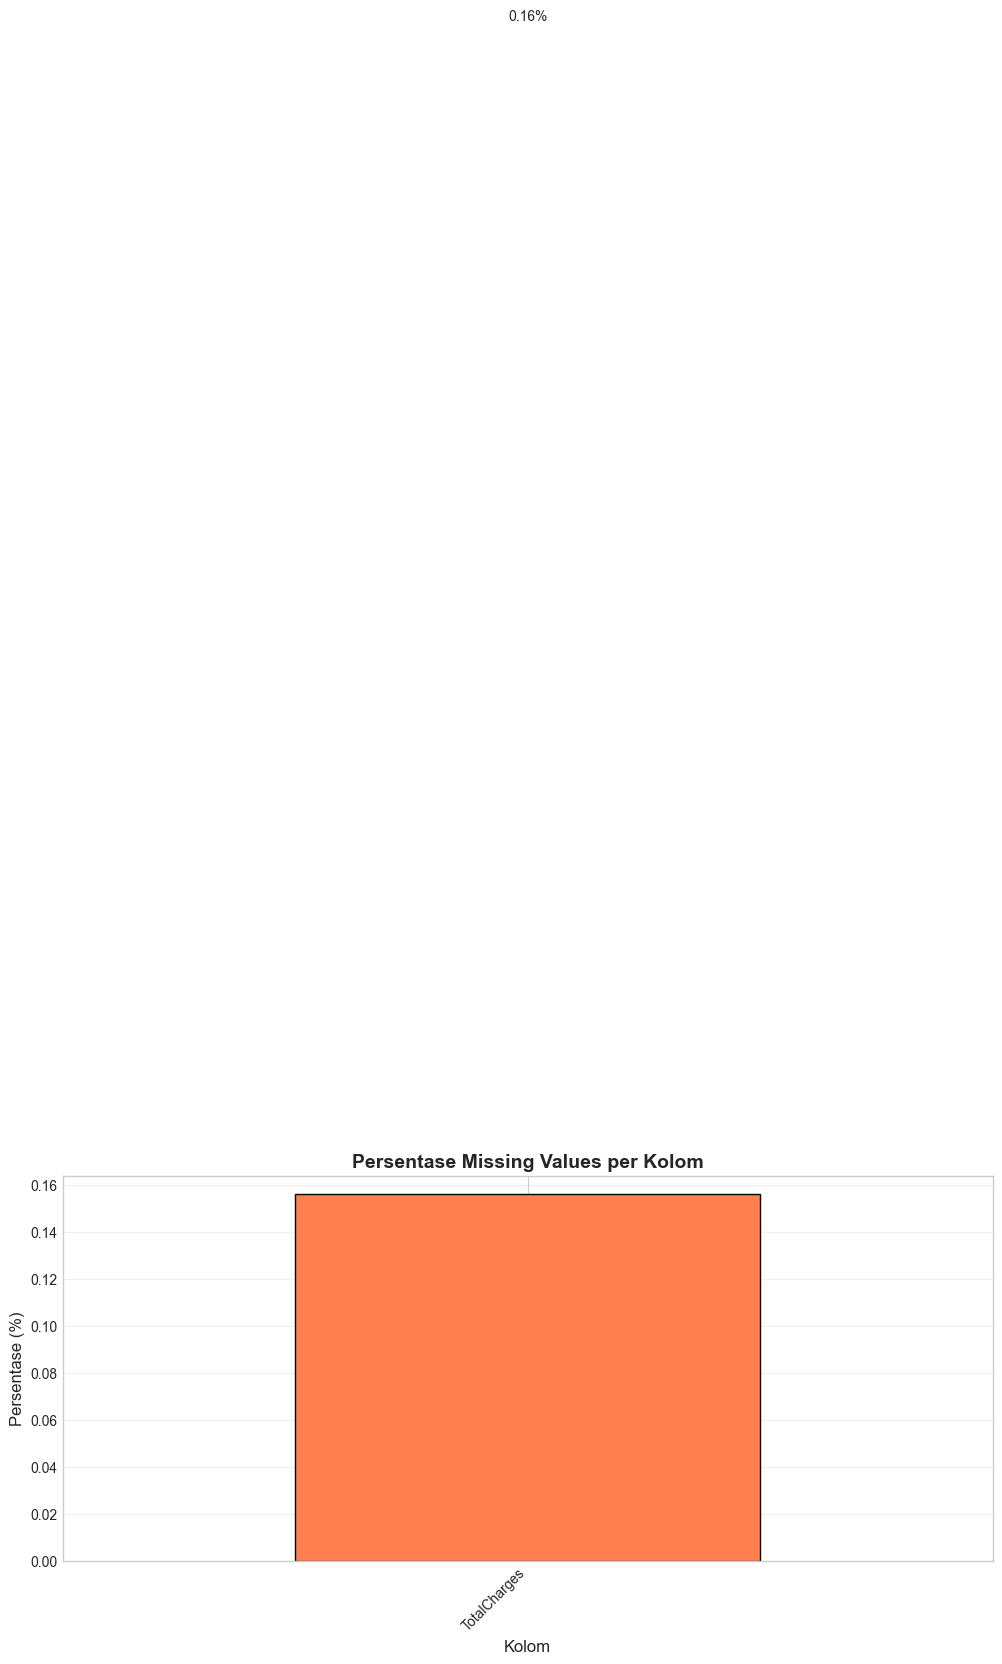

In [5]:
print("\n" + "="*50)
print("2. ANALISIS MISSING VALUES")
print("="*50)

# Konversi TotalCharges ke numeric (kolom ini sering jadi string)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

missing_counts = df.isnull().sum()
missing_percent = (missing_counts / len(df)) * 100

missing_df = pd.DataFrame({
    'Missing_Count': missing_counts,
    'Missing_Percent': missing_percent
})

print("\nMissing values per kolom:")
print(missing_df[missing_df['Missing_Count'] > 0])

# Visualisasi
if missing_counts.sum() > 0:
    plt.figure(figsize=(12, 5))
    
    # Filter hanya kolom dengan missing
    missing_to_plot = missing_percent[missing_percent > 0]
    
    if len(missing_to_plot) > 0:
        ax = missing_to_plot.plot(kind='bar', color='coral', edgecolor='black')
        plt.title('Persentase Missing Values per Kolom', fontsize=14, fontweight='bold')
        plt.ylabel('Persentase (%)', fontsize=12)
        plt.xlabel('Kolom', fontsize=12)
        plt.xticks(rotation=45, ha='right')
        
        # Tambahkan nilai
        for i, v in enumerate(missing_to_plot):
            ax.text(i, v + 0.5, f'{v:.2f}%', ha='center', fontsize=10)
        
        plt.grid(axis='y', alpha=0.3)
        plt.tight_layout()
        plt.savefig('missing_values.png', dpi=100)
        plt.show()
    else:
        print("✅ Tidak ada missing values!")
else:
    print("✅ Tidak ada missing values sama sekali!")

Distribution Target

C:\Users\singg\AppData\Local\Temp\ipykernel_18200\4099152750.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', ax=axes[2],



3. DISTRIBUSI VARIABLE TARGET (Churn)

Distribusi Churn:
No: 5174 pelanggan (73.5%)
Yes: 1869 pelanggan (26.5%)


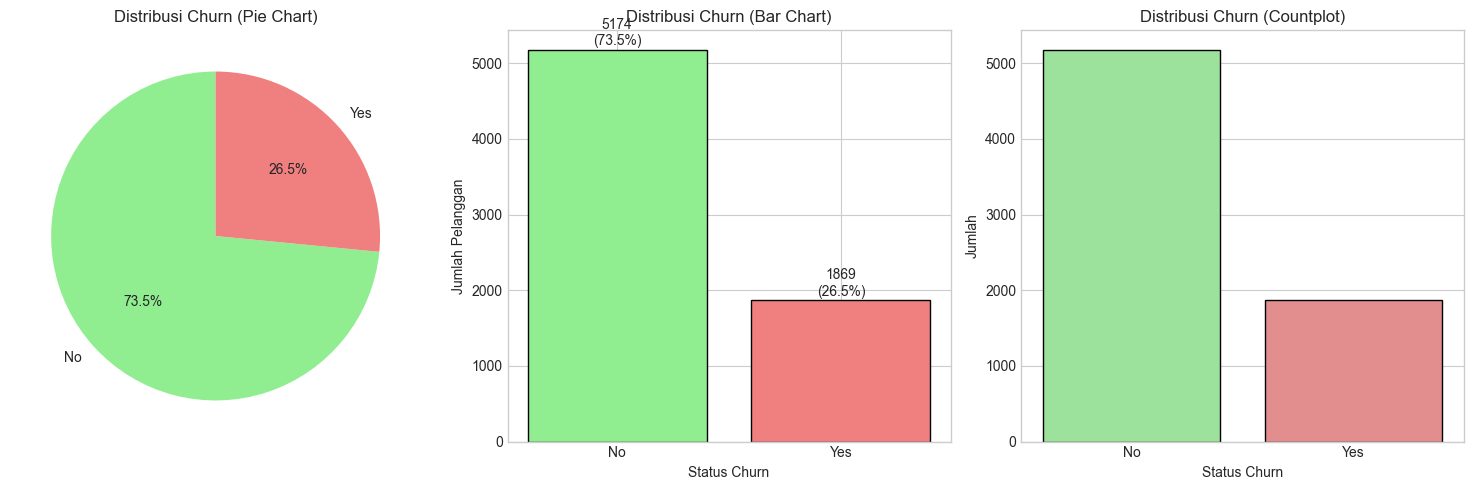

In [6]:
print("\n" + "="*50)
print("3. DISTRIBUSI VARIABLE TARGET (Churn)")
print("="*50)

churn_counts = df['Churn'].value_counts()
churn_percent = df['Churn'].value_counts(normalize=True) * 100

print("\nDistribusi Churn:")
for status, count in churn_counts.items():
    percent = churn_percent[status]
    print(f"{status}: {count} pelanggan ({percent:.1f}%)")

# Visualisasi
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Pie chart
axes[0].pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', 
           colors=['lightgreen', 'lightcoral'], startangle=90)
axes[0].set_title('Distribusi Churn (Pie Chart)')

# Bar chart
bars = axes[1].bar(churn_counts.index, churn_counts.values, 
                  color=['lightgreen', 'lightcoral'], edgecolor='black')
axes[1].set_title('Distribusi Churn (Bar Chart)')
axes[1].set_ylabel('Jumlah Pelanggan')
axes[1].set_xlabel('Status Churn')

# Tambahkan nilai di atas bar
for bar in bars:
    height = bar.get_height()
    axes[1].text(bar.get_x() + bar.get_width()/2., height + 20,
                f'{int(height)}\n({height/len(df)*100:.1f}%)',
                ha='center', va='bottom')

# Countplot dengan seaborn
sns.countplot(data=df, x='Churn', ax=axes[2], 
              palette=['lightgreen', 'lightcoral'], edgecolor='black')
axes[2].set_title('Distribusi Churn (Countplot)')
axes[2].set_ylabel('Jumlah')
axes[2].set_xlabel('Status Churn')

plt.tight_layout()
plt.savefig('churn_distribution.png', dpi=100)
plt.show()

Numeric Correlation


4. ANALISIS KORELASI NUMERIK

Kolom numerik: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

Matriks Korelasi:
                SeniorCitizen  tenure  MonthlyCharges  TotalCharges
SeniorCitizen            1.00    0.02            0.22          0.10
tenure                   0.02    1.00            0.25          0.83
MonthlyCharges           0.22    0.25            1.00          0.65
TotalCharges             0.10    0.83            0.65          1.00


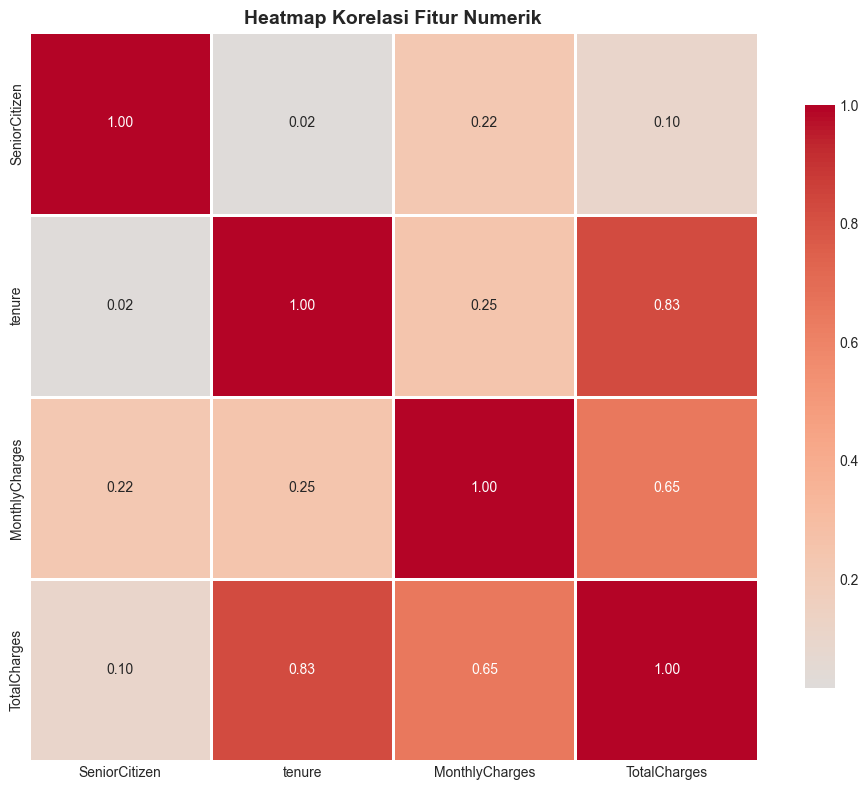


Korelasi yang cukup kuat (|r| > 0.5):
tenure - TotalCharges: 0.826
TotalCharges - tenure: 0.826
MonthlyCharges - TotalCharges: 0.651
TotalCharges - MonthlyCharges: 0.651

EDA SELESAI!


In [7]:
print("\n" + "="*50)
print("4. ANALISIS KORELASI NUMERIK")
print("="*50)

# Pilih kolom numerik
numeric_cols = df.select_dtypes(include=[np.number]).columns

if len(numeric_cols) > 1:
    print(f"\nKolom numerik: {list(numeric_cols)}")
    
    # Hitung korelasi
    correlation_matrix = df[numeric_cols].corr()
    
    print("\nMatriks Korelasi:")
    print(correlation_matrix.round(2))
    
    # Heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', 
                center=0, fmt='.2f', square=True,
                cbar_kws={"shrink": 0.8}, linewidths=1)
    plt.title('Heatmap Korelasi Fitur Numerik', fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig('correlation_heatmap.png', dpi=100)
    plt.show()
    
    # Identifikasi korelasi kuat
    print("\nKorelasi yang cukup kuat (|r| > 0.5):")
    strong_corr = correlation_matrix.unstack().sort_values(
        key=lambda x: abs(x), ascending=False
    )
    strong_corr = strong_corr[abs(strong_corr) > 0.5]
    strong_corr = strong_corr[strong_corr != 1.0]  # Hapus korelasi dengan diri sendiri
    
    for (col1, col2), corr in strong_corr.items():
        print(f"{col1} - {col2}: {corr:.3f}")
else:
    print("Hanya ada 1 kolom numerik, tidak bisa menghitung korelasi")

print("\n" + "="*50)
print("EDA SELESAI!")
print("="*50)